In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2023-06-15 12:45:49.020598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.10.0


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

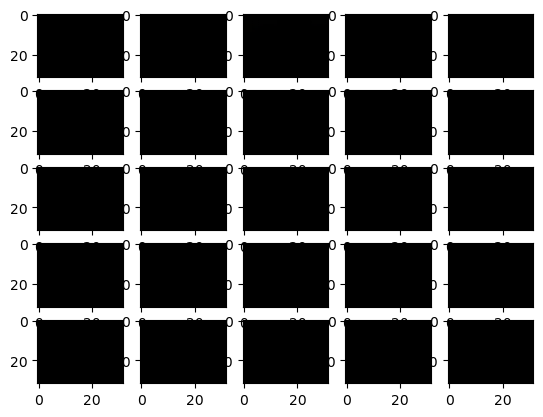

In [5]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

In [6]:
# Convert the images to RGB
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

print("Original shape:", x_train.shape)
print("RGB shape:", x_train_rgb.shape)

# Assuming you have an image array called "image"
num_channels = x_train_rgb.shape[-1]
num_channels2 = x_test_rgb.shape[-1]

print("Number of channels:", num_channels)
print("Number of channels:", num_channels2)

# Convert the images to float32
# Assuming you have RGB images in x_train_rgb and x_test_rgb
x_train_float32 = x_train_rgb.astype('float32')
x_test_float32 = x_test_rgb.astype('float32')

print("Original data type:", x_train_rgb.dtype)
print("Float32 data type:", x_train_float32.dtype)


# Normalize the pixel values to the range [0, 1]
# Assuming you have RGB images in x_train_float32 and x_test_float32

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train_float32 / 255.0
x_test_normalized = x_test_float32 / 255.0

print("Original pixel value range:", x_train_float32.min(), x_train_float32.max())
print("Normalized pixel value range:", x_train_normalized.min(), x_train_normalized.max())


Original shape: (50000, 32, 32, 3)
RGB shape: (50000, 32, 32, 9)
Number of channels: 9
Number of channels: 9
Original data type: float64
Float32 data type: float32
Original pixel value range: 0.0 0.003921569
Normalized pixel value range: 0.0 1.5378702e-05


In [7]:
# Extract the red channel from each image
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the red channel from each image
x_train_red = x_train_normalized[..., 0]
x_test_red = x_test_normalized[..., 0]

print("Original shape:", x_train_normalized.shape)
print("Red channel shape:", x_train_red.shape)



# Assuming you have red channel arrays in x_train_red and x_test_red

# Reshape the red channel arrays
x_train_red_reshaped = np.expand_dims(x_train_red, axis=-1)
x_test_red_reshaped = np.expand_dims(x_test_red, axis=-1)

print("Original shape:", x_train_red.shape)
print("Reshaped shape:", x_train_red_reshaped.shape)


Original shape: (50000, 32, 32, 9)
Red channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [8]:
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the green channel from each image
x_train_green = x_train_normalized[..., 1]
x_test_green = x_test_normalized[..., 1]

print("Original shape:", x_train_normalized.shape)
print("Green channel shape:", x_train_green.shape)


# Assuming you have green channel arrays in x_train_green and x_test_green

# Reshape the green channel arrays
x_train_green_reshaped = np.expand_dims(x_train_green, axis=-1)
x_test_green_reshaped = np.expand_dims(x_test_green, axis=-1)

print("Original shape:", x_train_green.shape)
print("Reshaped shape:", x_train_green_reshaped.shape)

Original shape: (50000, 32, 32, 9)
Green channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [9]:
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the blue channel from each image
x_train_blue = x_train_normalized[..., 2]
x_test_blue = x_test_normalized[..., 2]

print("Original shape:", x_train_normalized.shape)
print("Blue channel shape:", x_train_blue.shape)


# Assuming you have blue channel arrays in x_train_blue and x_test_blue

# Reshape the blue channel arrays
x_train_blue_reshaped = np.expand_dims(x_train_blue, axis=-1)
x_test_blue_reshaped = np.expand_dims(x_test_blue, axis=-1)

print("Original shape:", x_train_blue.shape)
print("Reshaped shape:", x_train_blue_reshaped.shape)

Original shape: (50000, 32, 32, 9)
Blue channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

s1=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index1, valid_index1 = next(s1.split(x_train_red_reshaped, y_train))
x_valid1, y_valid1 = x_train_red_reshaped[valid_index1], y_train[valid_index1]
x_train1, y_train1 = x_train_red_reshaped[train_index1], y_train[train_index1]

print(x_train1.shape, x_valid1.shape, x_test_red_reshaped.shape)


s2=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index2, valid_index2 = next(s2.split(x_train_green_reshaped, y_train))
x_valid2, y_valid2 = x_train_green_reshaped[valid_index2], y_train[valid_index2]
x_train2, y_train2 = x_train_green_reshaped[train_index2], y_train[train_index2]

print(x_train2.shape, x_valid2.shape, x_test_green_reshaped.shape)

s3=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index3, valid_index3 = next(s3.split(x_train_blue_reshaped, y_train))
x_valid3, y_valid3 = x_train_blue_reshaped[valid_index3], y_train[valid_index3]
x_train3, y_train3 = x_train_blue_reshaped[train_index3], y_train[train_index3]

print(x_train3.shape, x_valid3.shape, x_test_blue_reshaped.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)
(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)
(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


In [11]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 10


In [12]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_red_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = Flatten()(x)
#x = Dropout(0.2)(x)

# Hidden layer
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
#x = Dense(K, activation='softmax')(x)

model1 = Model(i, x)

# model description
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

2023-06-15 12:48:35.626134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_red_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

modela = Model(i, x)

# model description
modela.summary()

In [ ]:
# Compile
modela.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [ ]:
# Fit
r = modela.fit(
x_train_red_reshaped, y_train, validation_data=(x_test_red_reshaped, y_test), epochs=2)

In [13]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_green_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = Flatten()(x)
#x = Dropout(0.2)(x)

# Hidden layer
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
#x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)

# model description
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_green_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

modelb = Model(i, x)

# model description
modelb.summary()

In [ ]:
# Compile
modelb.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [ ]:

# Fit
r = modelb.fit(
x_train_green_reshaped, y_train, validation_data=(x_test_green_reshaped, y_test), epochs=2)

In [14]:
from keras.layers.merging.concatenate import Concatenate

# Assuming you have two models: model1 and model2
output1 = model1.get_layer('max_pooling2d_2').output
output2 = model2.get_layer('max_pooling2d_5').output
# Concatenate the two output layers
concatenated = Concatenate()([output1, output2])
print(concatenated.shape)

(None, 4, 4, 256)


In [17]:
# Build the model using the functional API
# input layer
i = Input(shape=concatenated[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
#x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
#x = MaxPooling2D((2, 2))(x)

#x = Flatten()(x)
#x = Dropout(0.2)(x)

# Hidden layer
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
#x = Dense(K, activation='softmax')(x)

model3 = Model(i, x)

# model description
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 4, 256)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 32)          73760     
                                                                 
 batch_normalization_18 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 batch_normalization_19 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 32)         0   

In [ ]:
import tensorflow as tf

# Assuming your input tensor has shape (None, 4, 4, 256)
input_shape = concatenated.shape

# Define the target shape
target_shape = (None, 32, 32, 1)

# Create a placeholder for the input tensor
input_tensor = tf.keras.Input(shape=input_shape[1:])

# Upsample the input tensor using Conv2DTranspose
upsampled_tensor = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(8, 8), strides=(8, 8), padding='same')(input_tensor)

# Crop the output tensor to the desired shape
cropped_tensor = upsampled_tensor[:, :target_shape[1], :target_shape[2], :]

# Print the shape of the resulting tensor
print(cropped_tensor.shape)



In [ ]:
i = Input(shape=cropped_tensor[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

modelc = Model(i, x)

# model description
modelc.summary()

In [ ]:
# Compile
modelc.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = modelc.fit(
x_train_green_reshaped, y_train, validation_data=(x_test_green_reshaped, y_test), epochs=2)

In [18]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_blue_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = Flatten()(x)
#x = Dropout(0.2)(x)

# Hidden layer
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
#x = Dense(K, activation='softmax')(x)

model4 = Model(i, x)

# model description
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0   

In [20]:

from keras.layers.merging.concatenate import Concatenate

# Assuming you have two models: model1 and model2
output3 = model3.get_layer('batch_normalization_19').output
output4 = model4.get_layer('max_pooling2d_13').output
# Concatenate the two output layers
concatenated1 = Concatenate()([output3, output4])
print(concatenated1.shape)

(None, 4, 4, 160)


In [22]:
# Build the model using the functional API
# input layer
i = Input(shape=concatenated1[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = Flatten()(x)
#x = Dropout(0.2)(x)

# Hidden layer
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
#x = Dense(K, activation='softmax')(x)

model5 = Model(i, x)

# model description
model5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 4, 160)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 4, 32)          46112     
                                                                 
 batch_normalization_34 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 batch_normalization_35 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)         0   

In [23]:
x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model5 = Model(i, x)

# model description
model5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 4, 160)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 4, 32)          46112     
                                                                 
 batch_normalization_34 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 batch_normalization_35 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)         0   

In [ ]:
import tensorflow as tf

# Assuming your input tensor has shape (None, 4, 4, 256)
input_shape1 = concatenated1.shape

# Define the target shape
target_shape1 = (None, 32, 32, 1)

# Create a placeholder for the input tensor
input_tensor1 = tf.keras.Input(shape=input_shape1[1:])

# Upsample the input tensor using Conv2DTranspose
upsampled_tensor1 = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(8, 8), strides=(8, 8), padding='same')(input_tensor1)

# Crop the output tensor to the desired shape
cropped_tensor1 = upsampled_tensor1[:, :target_shape1[1], :target_shape1[2], :]

# Print the shape of the resulting tensor
print(cropped_tensor1.shape)

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=cropped_tensor1[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model4 = Model(i, x)

# model description
model4.summary()

In [26]:
print(x_train.shape)

(50000, 32, 32, 3)
